In [1]:
#imoporting the libraries
import pandas as pd 
import numpy as np
import re
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup 
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords # Import the stop word list
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sparashuram/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
#Reading train csv
data_train=pd.read_csv("train.csv")
data_train.head()

,id,user_id,joke_id,Rating
0,31030_110,31030,110,2.750
1,16144_109,16144,109,5.094
2,23098_6,23098,6,-6.438
3,14273_86,14273,86,4.406
4,18419_134,18419,134,9.375


In [3]:
#reading jokes csv
data_jokes=pd.read_csv("jokes.csv")
data_jokes.head()

,joke_id,joke_text
0,1,Q. What's O. J. Simpson's web address? A. Slas...
1,2,How many feminists does it take to screw in a ...
2,3,Q. Did you hear about the dyslexic devil worsh...
3,4,They asked the Japanese visitor if they have e...
4,5,Q: What did the blind person say when given so...


In [4]:
data_jokes.head()

,joke_id,joke_text
0,1,Q. What's O. J. Simpson's web address? A. Slas...
1,2,How many feminists does it take to screw in a ...
2,3,Q. Did you hear about the dyslexic devil worsh...
3,4,They asked the Japanese visitor if they have e...
4,5,Q: What did the blind person say when given so...


In [5]:
def review_to_words( raw_review ):
    # Function to convert a raw sentence to a string of words
    # The input is a single string (a raw sentence), and 
    # the output is a single string (a preprocessed sentence)
    #
    # 1. Remove HTML
    review_text = BeautifulSoup(raw_review,).get_text() 
    #
    # 2. Remove non-letters        
    letters_only = re.sub("[^a-zA-Z]", " ", review_text) 
    #
    # 3. Convert to lower case, split into individual words
    words = letters_only.lower().split()                                             
    #
    # 4. In Python, searching a set is much faster than searching
    #   a list, so convert the stop words to a set
    stops = set(stopwords.words("english"))                  
    # 
    # 5. Remove stop words
    meaningful_words = [w for w in words if not w in stops]   
    #
    # 6. Join the words back into one string separated by space, 
    # and return the result.
    return( " ".join( meaningful_words ))

In [6]:
# Get the number of reviews based on the dataframe column size
num_reviews = data_jokes["joke_text"].size

# Initialize an empty list to hold the clean reviews
clean_train_reviews = []

# Loop over each review; create an index i that goes from 0 to the length
# of the movie review list 
print ("Cleaning and parsing the training set of jokes...\n")
clean_train_reviews = []
for i in range( 0, num_reviews ):
    # If the index is evenly divisible by 10000, print a message
    if( (i+1)%20 == 0 ):
        print ("Review %d of %d\n" % ( i+1, num_reviews ))                                                                 
    data_jokes["joke_text"][i]=review_to_words( data_jokes["joke_text"][i])
print("Done")

Cleaning and parsing the training set of jokes...

Review 20 of 139

Review 40 of 139

Review 60 of 139

Review 80 of 139

Review 100 of 139

Review 120 of 139

Done


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [7]:
#merging train and jokes csv
data_train_final = data_train.merge(data_jokes, on='joke_id', how='left')
data_train_final.head()

,id,user_id,joke_id,Rating,joke_text
0,31030_110,31030,110,2.750,judy trouble computer called tony computer guy...
1,16144_109,16144,109,5.094,one day first grade teacher reading story thre...
2,23098_6,23098,6,-6.438,q orange sounds like parrot carrot
3,14273_86,14273,86,4.406,two attorneys went diner ordered two drinks pr...
4,18419_134,18419,134,9.375,man driving country one evening car stalls sta...


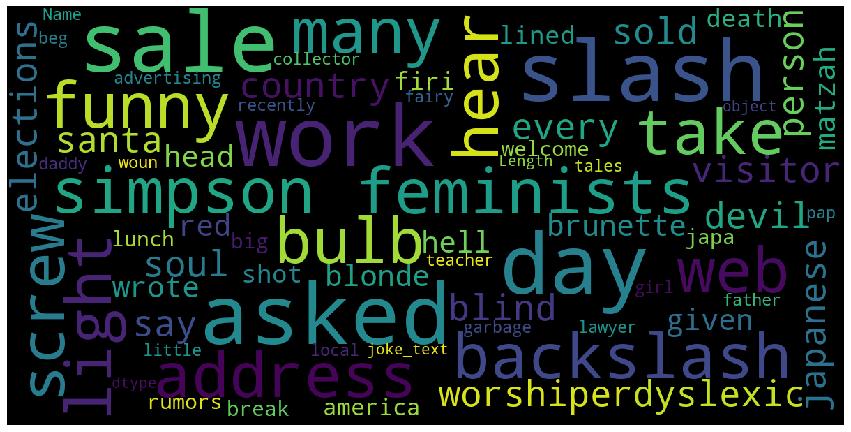

In [8]:
#visualizing the words
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='black',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
).generate(str(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(data_jokes['joke_text'])

In [9]:
#seperate independent and dependent variables
x=data_train_final['joke_text']
y=data_train_final['Rating']

In [10]:
#Splitting into training and testing
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=121)

In [11]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((873647,), (873647,), (218412,), (218412,))

Using Tfidf Vectorizer

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()
tf.fit(X_train)
X_train_transformed=tf.transform(X_train)
X_test_transformed=tf.transform(X_test)

#  Training the Linear Regression Algorithm 

In [13]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train_transformed,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
from sklearn.metrics import mean_squared_error
import math
mse=mean_squared_error(lr.predict(X_test_transformed),y_test.values)
rmse = math.sqrt(mse)
print(mse)
print(rmse)

24.67304489308484
4.967196884872275


# Training the Random Forest Regressor Algorithm

In [15]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train_transformed,y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [16]:
mse=mean_squared_error(rf.predict(X_test_transformed),y_test.values)
rmse = math.sqrt(mse)
print(mse)
print(rmse)

24.67377075220261
4.967269949600345


# Testing the model

In [17]:
data_test=pd.read_csv("test.csv")
data_test.head()

,id,user_id,joke_id
0,6194_11,6194,11
1,19356_3,19356,3
2,23426_79,23426,79
3,40030_3,40030,3
4,19806_115,19806,115


In [18]:
data_test_final = data_test.merge(data_jokes, on='joke_id', how='left')
data_test_final.head()


,id,user_id,joke_id,joke_text
0,6194_11,6194,11,difference used tire used condoms one goodyear...
1,19356_3,19356,3,q hear dyslexic devil worshiper sold soul santa
2,23426_79,23426,79,radio conversation us naval ship canadian auth...
3,40030_3,40030,3,q hear dyslexic devil worshiper sold soul santa
4,19806_115,19806,115,american tourist goes restaurant spain orders ...


In [19]:
test_data = tf.transform(data_test_final['joke_text'])

In [20]:
pred=lr.predict(test_data)
pred

array([ 2.95058268, -0.69685066,  3.6353895 , ...,  0.77180616,
        2.7573385 ,  2.90053403])